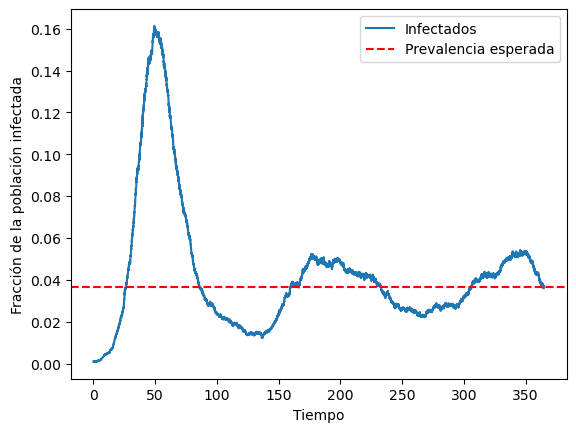

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo SIR
R_0 = 2.0  # Número reproductivo básico
gamma = 1/7  # Tasa de recuperación (inverso del periodo de infecciosidad)
delta = 1/90  # Tasa de pérdida de inmunidad (inverso del periodo de inmunidad)
N = 10000  # Población total
I0 = 10  # Casos iniciales
S0 = N - I0  # Individuos susceptibles iniciales
R0 = 0  # Individuos recuperados iniciales
t = 0  # Tiempo inicial
t_max = 365  # Tiempo máximo de simulación

# Simulación de la epidemia utilizando el algoritmo de Gillespie


def covid_sim(I0,S0,R0,t=0):
    S=S0
    I=I0
    R=R0
    tim = [t]
    infect = [I/N]
    while t < t_max and I > 0:
        rate_infection = R_0 * gamma * S * I / N
        rate_recovery = gamma * I
        rate_loss_of_immunity = delta * R
        total_rate = rate_infection + rate_recovery + rate_loss_of_immunity
        dt = -np.log(np.random.rand()) / total_rate
        t += dt
        rand = np.random.rand()
        if rand < rate_infection / total_rate:
            S -= 1
            I += 1
        elif rand < (rate_infection + rate_recovery) / total_rate:
            I -= 1
            R += 1
        else:
            R -= 1
            S += 1
        tim.append(t)
        infect.append(I/N)
    return infect, tim

infected,times=covid_sim(I0,S0,R0)
# Gráfica de la evolución de la epidemia
plt.figure()
plt.plot(times, infected, label='Infectados')
plt.xlabel('Tiempo')
plt.ylabel('Fracción de la población infectada')
plt.axhline(y=infected[-1], color='r', linestyle='--', label='Prevalencia esperada')
plt.legend()
plt.show()


### Promedio de simulaciones

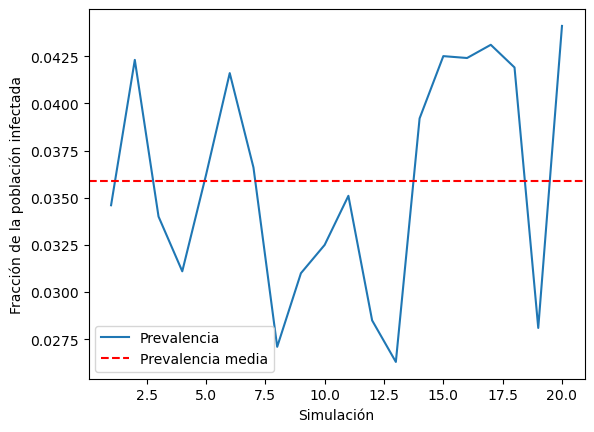

In [39]:
num_sims=20
espected_inf=[]

for i in range(num_sims):
    inf,_=covid_sim(I0,S0,R0)
    espected_inf.append(inf[-1])

# Gráfica de la evolución de la epidemia
plt.figure()
plt.plot(range(1,num_sims+1), espected_inf, label='Prevalencia')
plt.xlabel('Simulación')
plt.ylabel('Fracción de la población infectada')
plt.axhline(y=sum(espected_inf)/num_sims, color='r', linestyle='--', label='Prevalencia media')
plt.legend()
plt.show()